In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Concrete_Strength.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Loop through features to graph strength vs feature

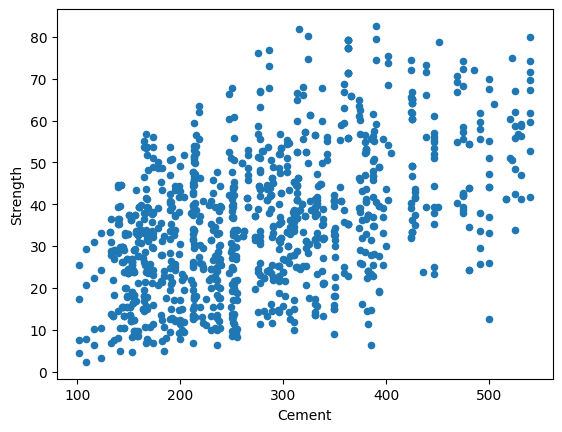

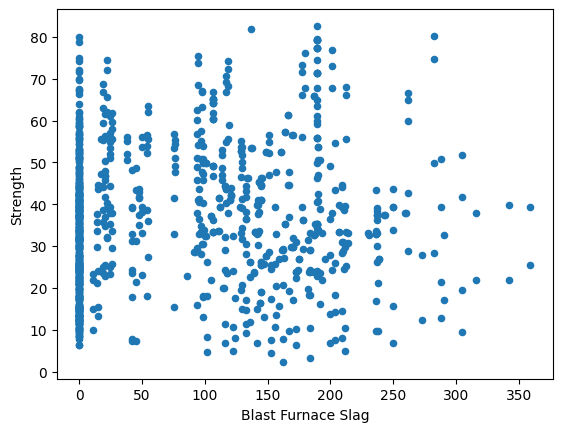

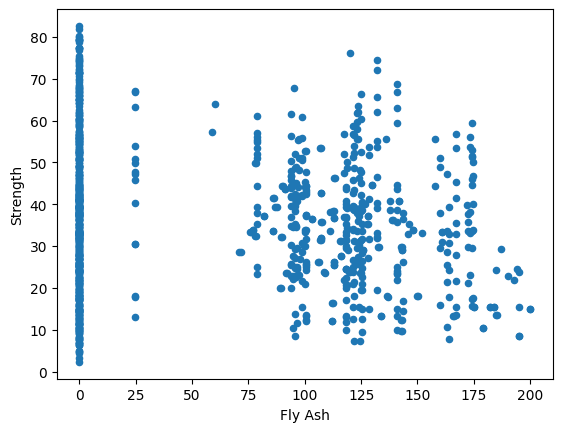

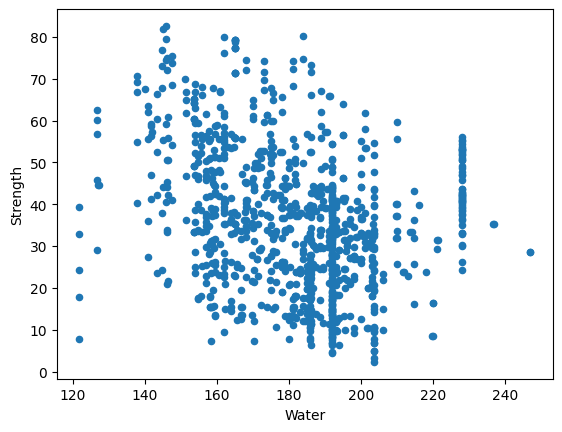

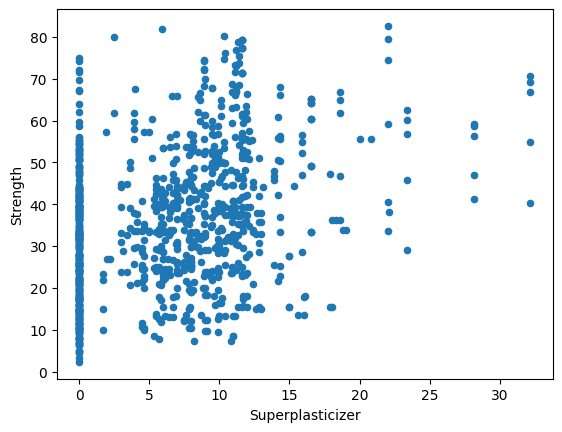

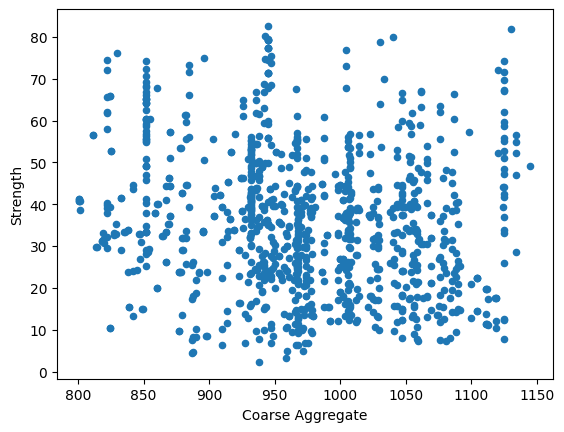

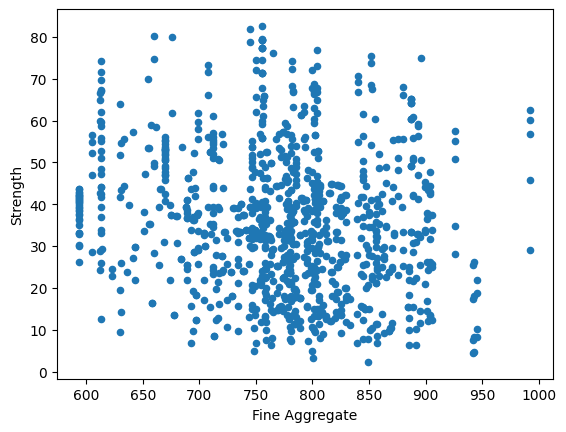

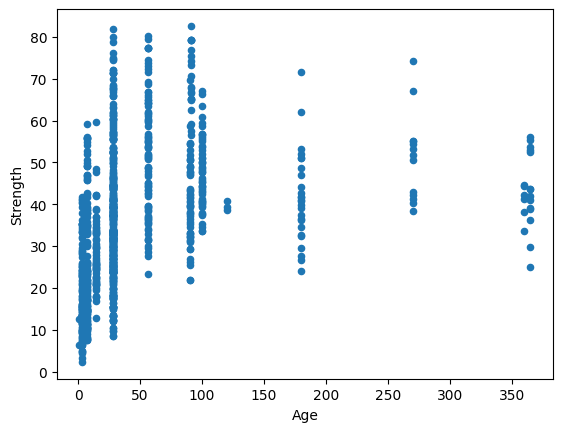

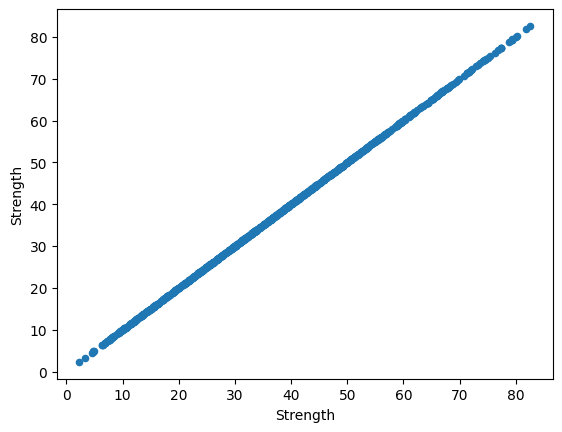

In [68]:
for columns in df.columns:
  df.plot(x= columns, y = 'Strength', kind= 'scatter')
  #cement, water and age

Loop Through Features and Characterize Frequency Distribution Using Histrograms

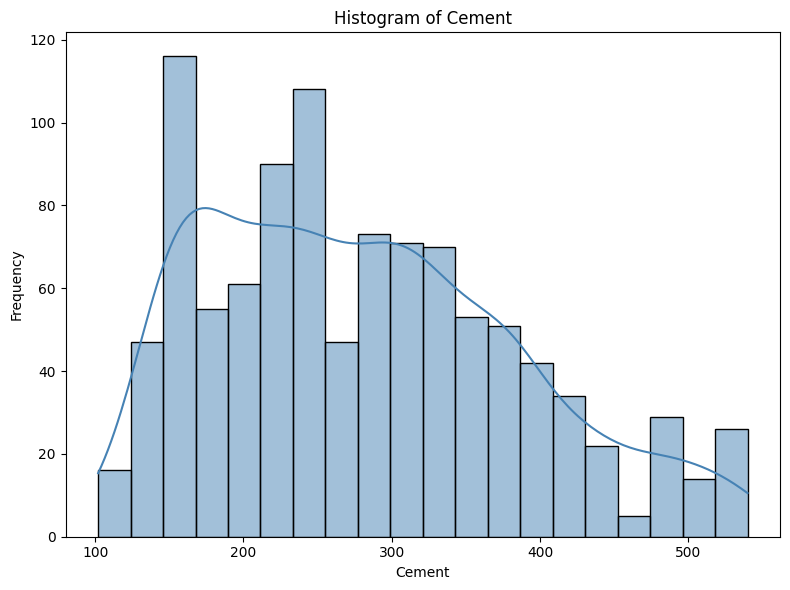

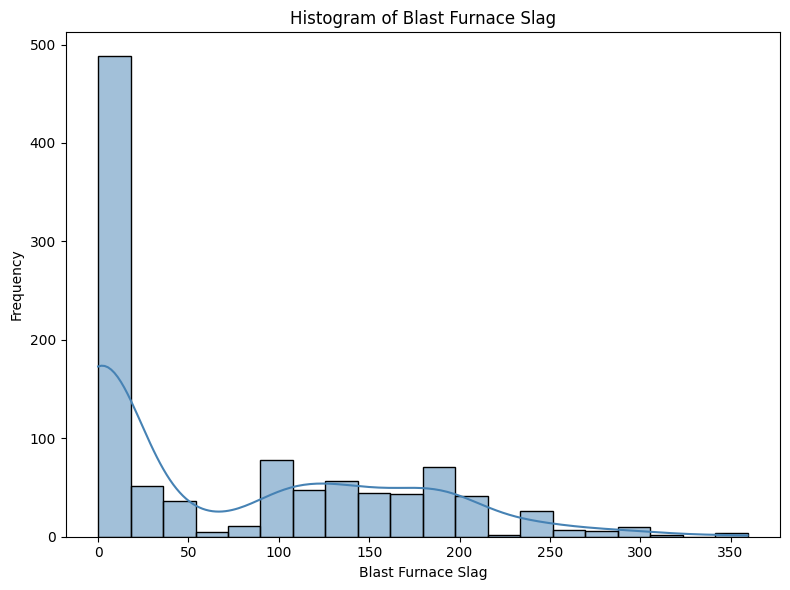

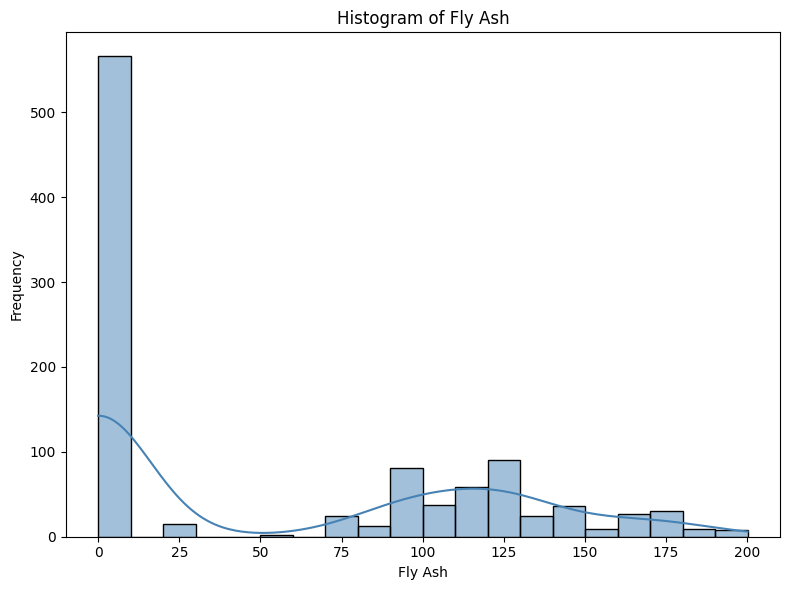

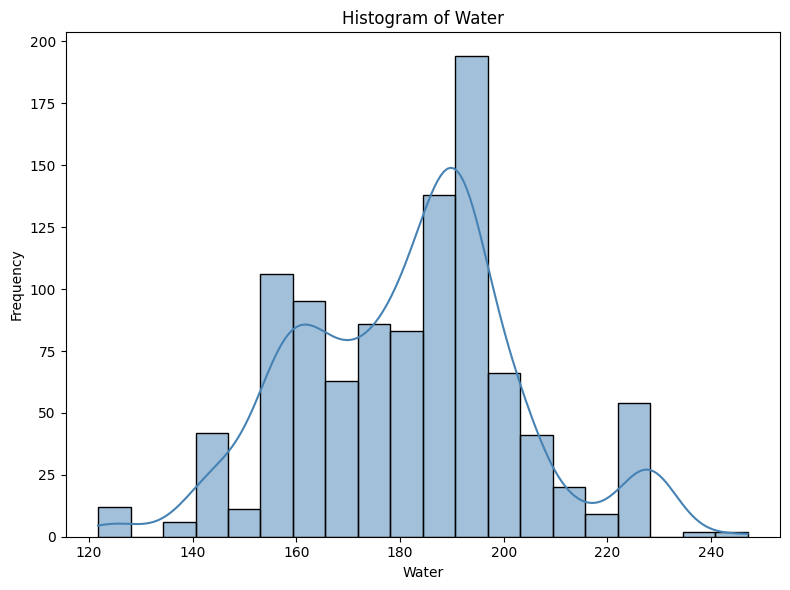

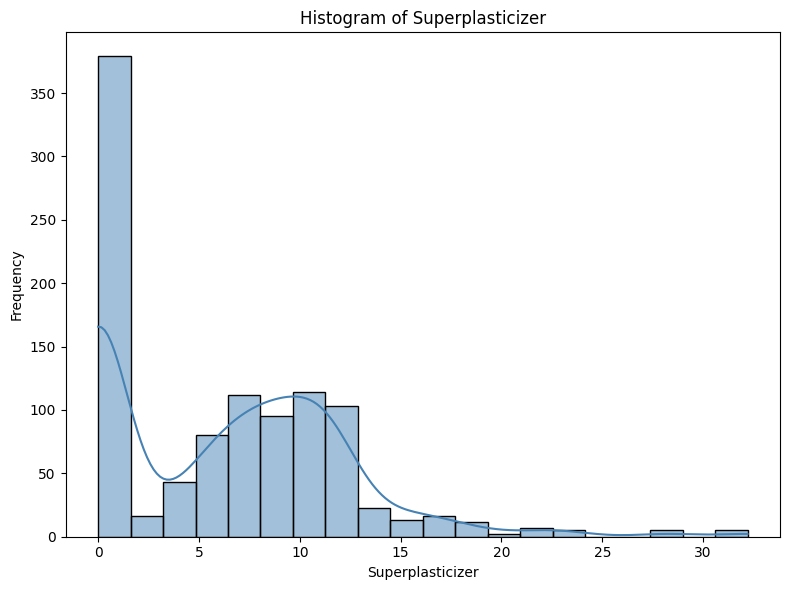

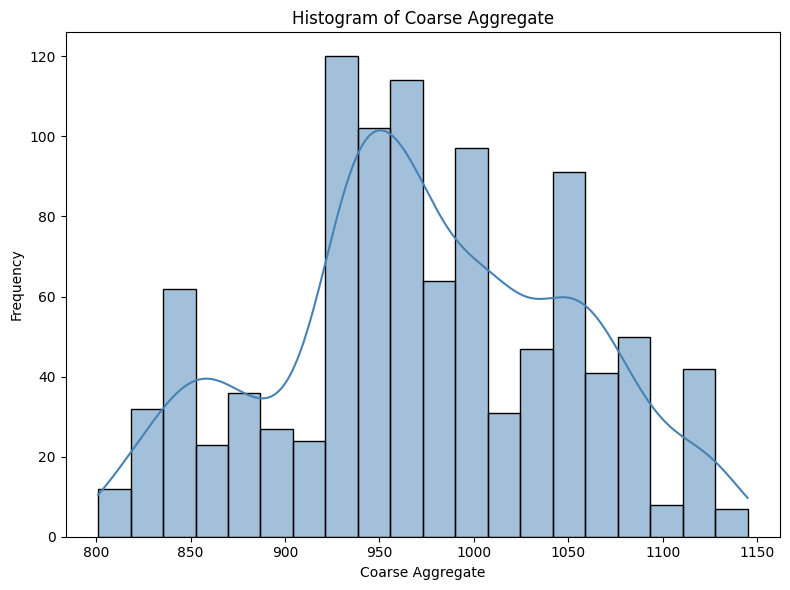

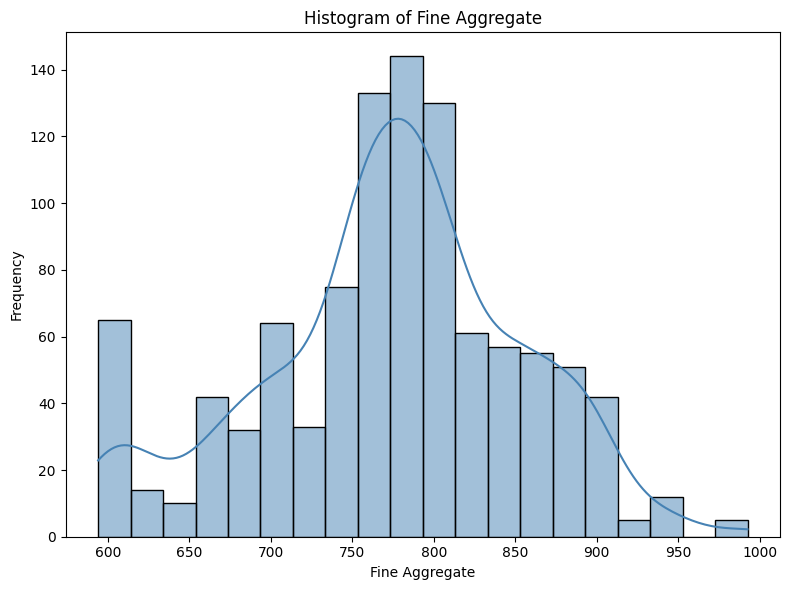

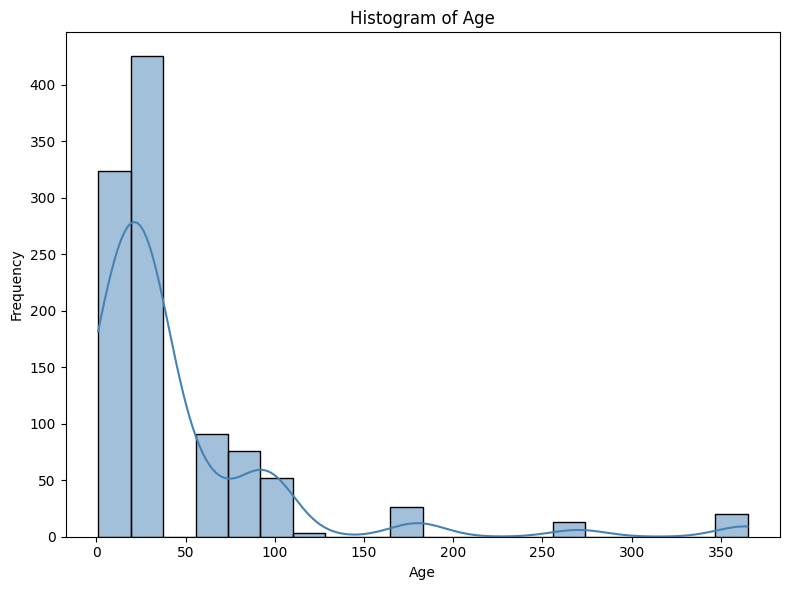

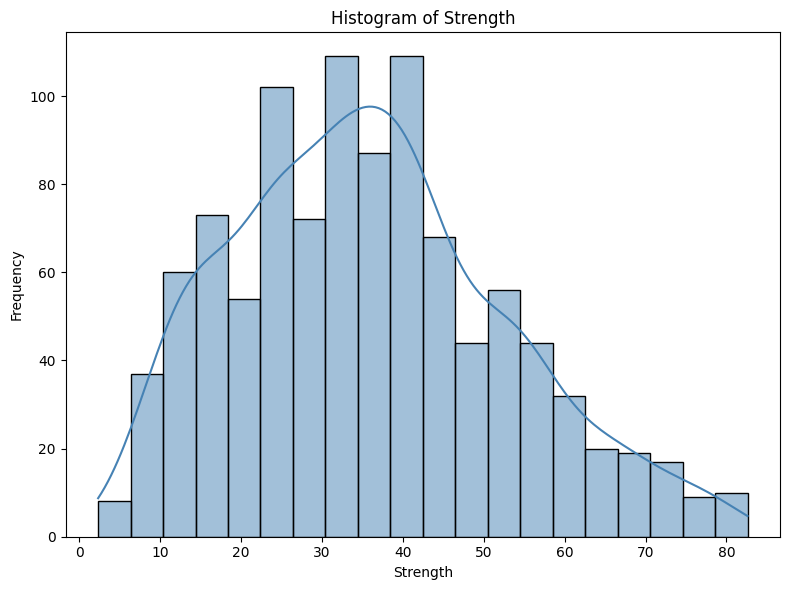

In [69]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], bins=20, kde=True, color='steelblue')
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

Find any outliers in each feature

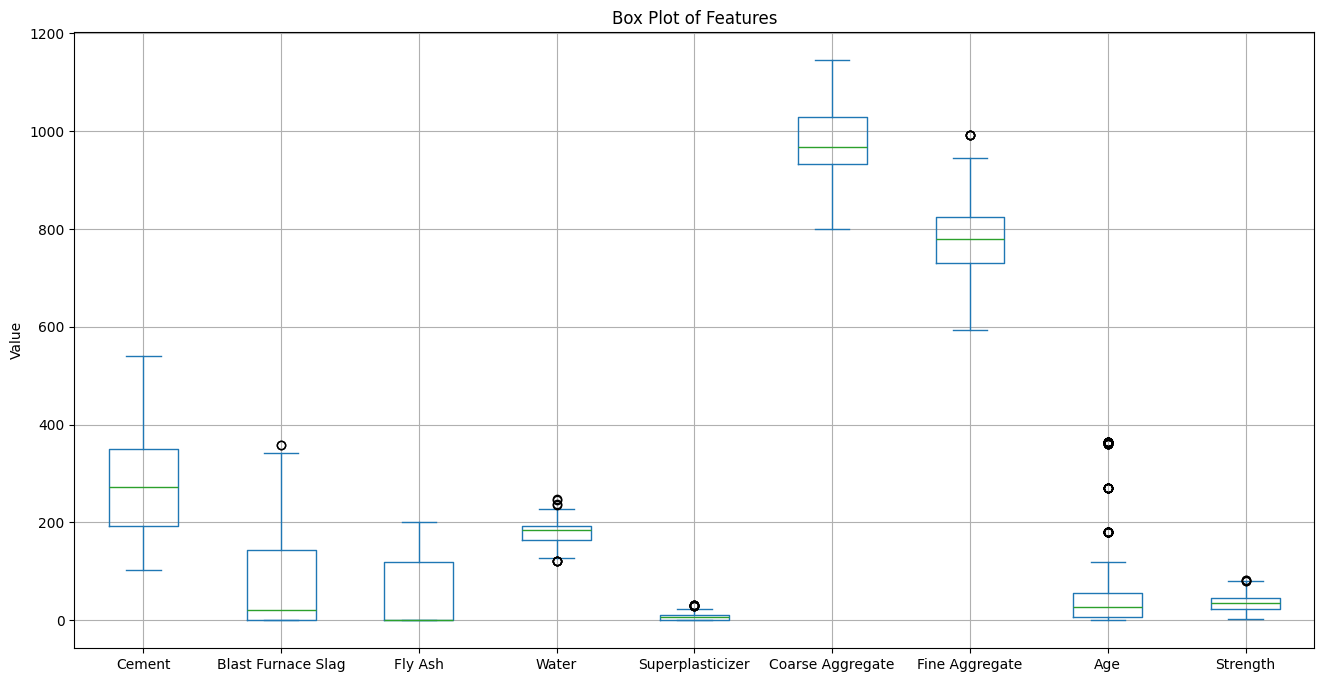

In [70]:
df.plot(kind='box', figsize=(16, 8))
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Remove outliers from dataset before running it through the original linear regression

In [71]:

def remove_outliers_iqr_all_columns(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply to your DataFrame
df_not_cleaned = df.copy()
df_cleaned = remove_outliers_iqr_all_columns(df)
#df_cleaned = df_not_cleaned.copy()
print(np.average(df['Age']))
print(np.average(df_cleaned['Age']))

45.662135922330094
32.22570194384449


Plot new data

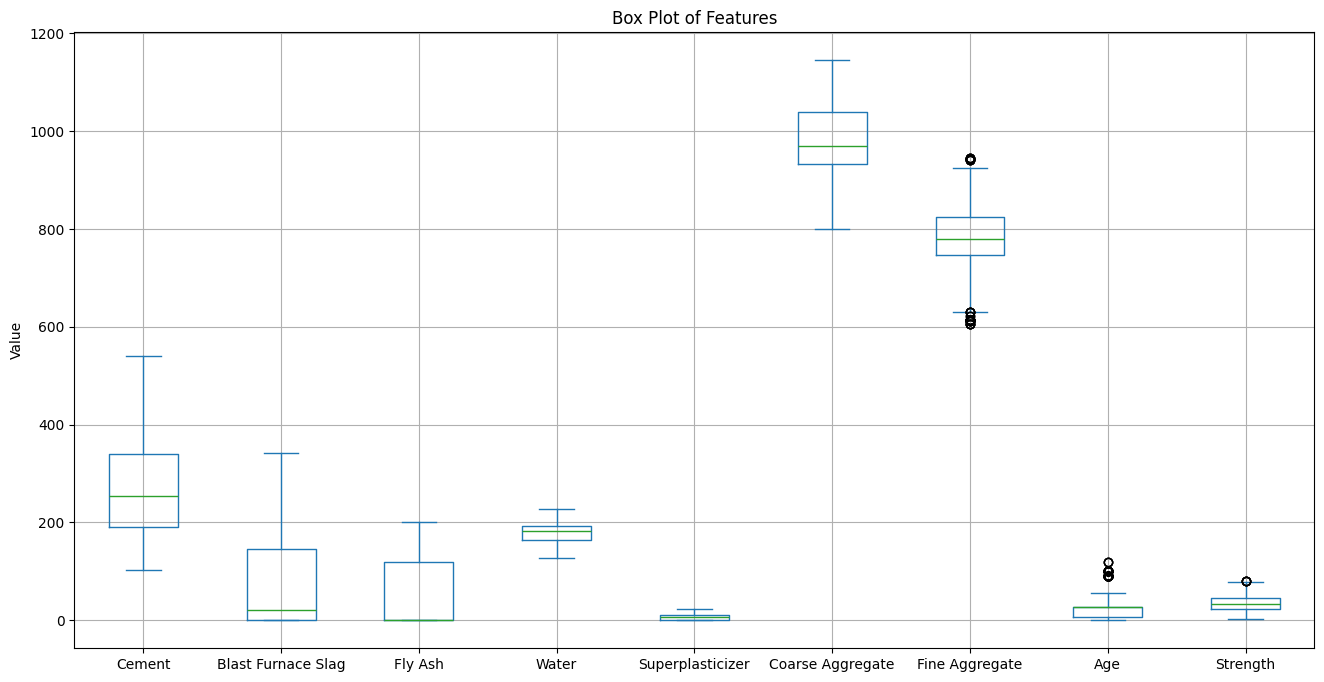

In [72]:
df_cleaned.plot(kind='box', figsize=(16, 8))
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Linear Regression Model With Outliers Included

In [78]:

X = df_not_cleaned[['Cement', 'Water', 'Age']]
#X = df[['Cement', 'Water', 'Age']]
X_scaled = StandardScaler().fit_transform(X)
y = df_not_cleaned['Strength']
#y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
slope = model.coef_

print("Intercept:", intercept)
print("Coefficients:", slope)

y_train_pred = model.predict(X_train)
y_test_pred_outliers = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred_outliers)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred_outliers)

print("MSE train Outlier Inlcuded:", mse_train, "MSE test Outlier Included:", mse_test)
print("R^2 train Outlier Included:", r2_train, "R^2 test Outlier Included", r2_test)

Intercept: 35.87925479702327
Coefficients: [ 7.07190773 -5.90048266  6.70861546]
MSE train Outlier Inlcuded: 158.97474889486375 MSE test Outlier Included: 128.7527780138605
R^2 train Outlier Included: 0.4403999857605658 R^2 test Outlier Included 0.5003324674025951


Create a linear regression model with 80/20 train/test split using cement, water, and age. Outliers are removed

In [79]:



X = df_cleaned[['Cement', 'Water', 'Age']]
#X = df[['Cement', 'Water', 'Age']]
X_scaled = StandardScaler().fit_transform(X)
y = df_cleaned['Strength']
#y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
slope = model.coef_

print("Intercept:", intercept)
print("Coefficients:", slope)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE train:", mse_train, "MSE test:", mse_test)
print("R^2 train:", r2_train, "R^2 test", r2_test)






Intercept: 34.649404727917464
Coefficients: [ 7.5359889  -4.86528151  8.71483939]
MSE train: 105.81363578511974 MSE test: 111.26732812851878
R^2 train: 0.6006578580764989 R^2 test 0.6615450819190383


Plot the Linear Regression Model

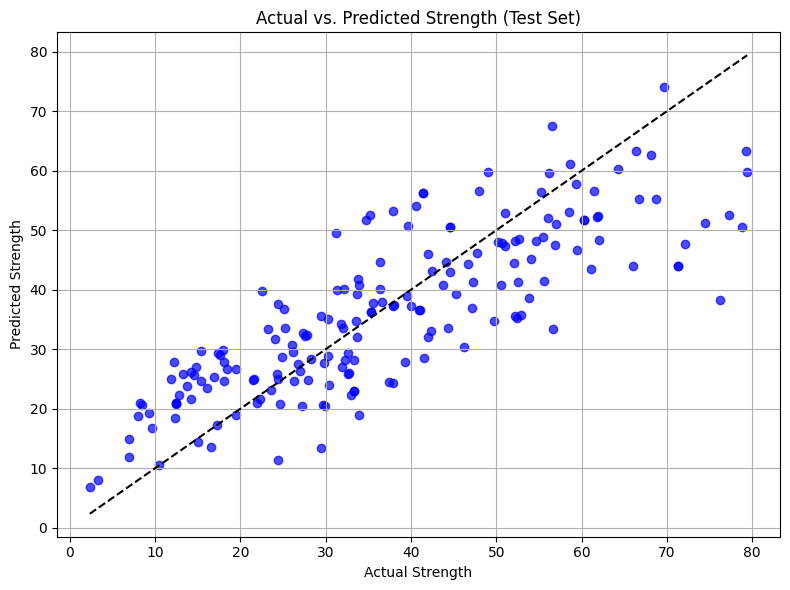

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color = 'blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # ideal fit line
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs. Predicted Strength (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

Use PCA analysis to preprocess the data

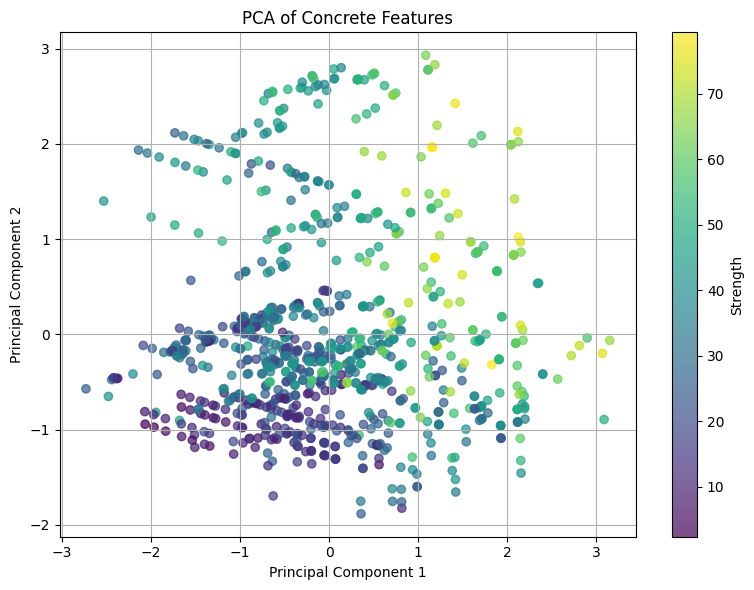

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_cleaned[['Cement', 'Water', 'Age']]
#X = df[['Cement', 'Water', 'Age']]
y = df_cleaned['Strength']
#y = df['Strength']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Strength'] = y.values

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Strength'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Strength')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Concrete Features')
plt.grid(True)
plt.tight_layout()
plt.show()

Create a second model to test PCA data

MSE_train: 125.26997054596109 MSE_test: 127.33961771995804
R^2: 0.6126561084122698


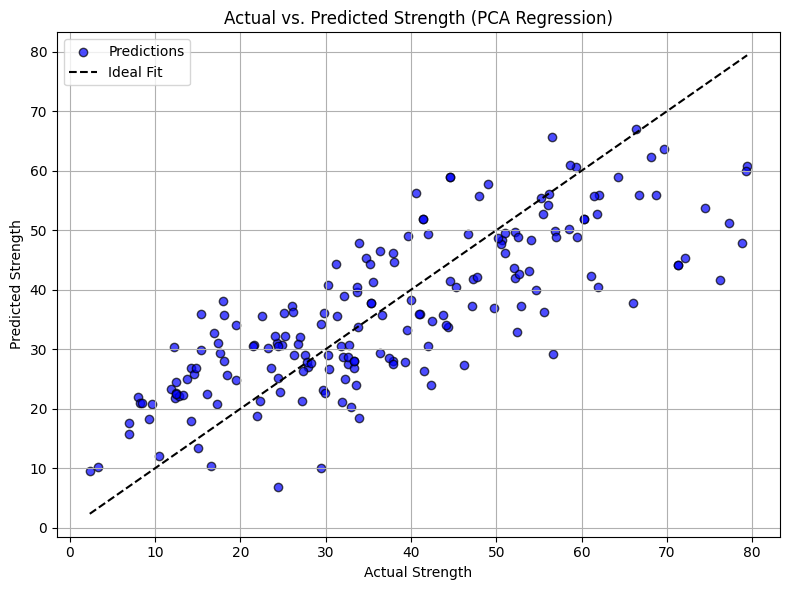

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_pca = model.predict(X_test)

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test,y_pred_pca)
r2 = r2_score(y_test, y_pred_pca)

print("MSE_train:", mse_train, "MSE_test:", mse_test)
print("R^2:", r2)

plt.figure(figsize=(8, 6))

# Blue scatter points with black edges
plt.scatter(y_test, y_pred_pca, color='blue', alpha=0.7, edgecolors='k', label='Predictions')

# Black dashed identity line (ideal fit)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Fit')

plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs. Predicted Strength (PCA Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Why PCA Can Hurt Linear Regression Performance

PCA (Principal Component Analysis) is useful for dimensionality reduction, but applying it before linear regression can sometimes reduce model performance. Key reasons include:

---

- **Loss of predictive information:** PCA removes low-variance components, but those may still carry important signals for predicting the target. Discarding them can hurt accuracy.

- **PCA ignores the target variable:** PCA is unsupervised—it reduces dimensions based on feature variance, not their relevance to the output. High-variance directions may not be the most predictive.

- **Too much compression (underfitting):** Keeping too few principal components can oversimplify the data, causing the model to underfit and miss key patterns.

- **Misaligned feature space:** If the target’s relationship to features doesn’t align with principal components, PCA can distort the true signal.

- **Loss of interpretability:** PCA transforms features into linear combinations of original ones, making regression results harder to interpret.

- **Sensitivity to feature scaling:** PCA is scale-sensitive. Without proper standardization, it may emphasize unimportant components, reducing model performance.

---

**Summary:** PCA can reduce noise and multicollinearity, but it may harm performance if important predictive signals are lost or distorted.


In [62]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted PCA': y_pred_pca,
    'Predicted without Outliers': y_test_pred,
    #'Predicted with Outliers': y_test_pred_outliers
})

# Save to CSV
results_df.to_csv('predicted_results.csv', index=False)

print("Predicted results saved to 'predicted_results.csv'")


Predicted results saved to 'predicted_results.csv'
